<a href="https://colab.research.google.com/github/tonytao465/2024Spring/blob/main/SMA_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biopharma

### Install and import packages

In [ ]:
%reset -f
# Install and import packages
!pip install gurobipy
!pip install tabulate

import pandas as pd
import numpy as np
from gurobipy import Model, GRB, quicksum
from tabulate import tabulate
import datetime as dt
_empty_series = pd.Series(dtype=float)

### Raw Data

In [ ]:


demand = pd.DataFrame({
    'from': ['LatinAmerica', 'Europe', 'AsiaWoJapan', 'Japan', 'Mexico', 'U.S.'],
    'd_h': [  7, 15,  5,  7,  3, 18],
    'd_r': [  7, 12,  3,  8,  3, 17],
})
demand.set_index('from', inplace=True)

caps = pd.DataFrame({
    'plant': ['Brazil', 'Germany', 'India', 'Japan', 'Mexico', 'U.S.'],
    'cap': [18, 45, 18, 10, 30, 22],
})
caps.set_index('plant', inplace=True)

pcosts = pd.DataFrame({
    'plant': ['Brazil', 'Germany', 'India', 'Japan', 'Mexico', 'U.S.'],
    'fc_p': [20, 45, 14, 13, 30, 23],
    'fc_h': [ 5, 13,  3,  4,  6,  5],
    'fc_r': [ 5, 13,  3,  4,  6,  5],
    'rm_h': [3.6, 3.9, 3.6, 3.9, 3.6, 3.6],
    'pc_h': [5.1, 6.0, 4.5, 6.0, 5.0, 5.0],
    'rm_r': [4.6, 5.0, 4.5, 5.1, 4.6, 4.5],
    'pc_r': [6.6, 7.0, 6.0, 7.0, 6.5, 6.5],
})
pcosts.set_index('plant', inplace=True)

tcosts = pd.DataFrame({
    'from': ['Brazil', 'Germany', 'India', 'Japan', 'Mexico', 'U.S.'],
    'LatinAmerica': [ 0.20, 0.45, 0.50, 0.50, 0.40, 0.45],
    'Europe':    [ 0.45, 0.20, 0.35, 0.40, 0.30, 0.30],
    'AsiaWoJapan': [ 0.50, 0.35, 0.20, 0.30, 0.50, 0.45],
    'Japan':    [ 0.50, 0.40, 0.30, 0.10, 0.45, 0.45],
    'Mexico':    [ 0.40, 0.30, 0.50, 0.45, 0.20, 0.25],
    'U.S.':     [ 0.45, 0.30, 0.45, 0.45, 0.25, 0.20],
})
tcosts.set_index('from', inplace=True)

duties = pd.DataFrame({
    'from': ['LatinAmerica', 'Europe', 'AsiaWoJapan', 'Japan', 'Mexico', 'U.S.'],
    'duty': [ 0.30, 0.03, 0.27, 0.06, 0.35, 0.04],
})
duties.set_index('from', inplace=True)

sample = np.array([
 [5.34, 0.87, 73.12, 111.98, 20.65],
 [5.61, 0.93, 79.35, 122.17, 21.56],
 [4.16, 0.91, 76.79, 126.46, 19.36],
 [4.23, 0.91, 76.10, 128.22, 18.85],
 [4.22, 0.86, 69.37, 97.33, 21.08],
 [4.20, 0.91, 73.05, 118.18, 19.38],
 [5.52, 0.94, 81.67, 127.45, 20.77],
 [4.54, 0.93, 81.91, 137.21, 17.19],
 [4.82, 0.84, 73.08, 108.07, 20.52],
 [4.97, 0.90, 77.42, 130.46, 19.75],
 [4.84, 0.89, 73.91, 114.47, 19.16],
 [4.50, 0.88, 70.47, 105.61, 19.69],
 [4.40, 0.93, 77.82, 126.37, 18.31],
 [4.95, 0.85, 69.66, 99.07, 21.85],
 [6.10, 0.80, 77.01, 113.14, 21.22],
 [4.88, 0.82, 72.63, 106.83, 20.34],
 [5.07, 0.92, 76.77, 122.62, 21.26],
 [5.26, 0.93, 79.38, 126.43, 20.41],
 [5.20, 0.87, 77.40, 117.25, 20.04],
 [5.23, 0.95, 82.17, 141.17, 18.98],
 [4.57, 0.95, 80.92, 140.67, 17.96],
 [5.87, 0.87, 77.48, 112.36, 21.79],
 [5.87, 0.92, 83.38, 148.15, 18.00],
 [5.13, 0.86, 74.80, 114.58, 18.94],
 [4.09, 0.93, 70.38, 107.99, 21.15],
 [4.21, 0.81, 65.14, 86.71, 20.47],
 [5.16, 0.91, 82.57, 142.39, 17.50],
 [4.62, 0.81, 68.01, 96.29, 20.25],
 [5.43, 0.86, 77.79, 115.00, 19.58],
 [4.30, 0.85, 70.70, 107.89, 18.32],
 [5.07, 0.88, 75.58, 115.24, 19.68],
 [5.54, 0.95, 81.99, 129.21, 21.13],
 [5.23, 0.98, 80.79, 133.72, 20.65],
 [5.36, 0.90, 74.87, 112.97, 22.55],
 [4.72, 0.93, 77.88, 133.00, 18.29],
 [4.89, 0.95, 71.85, 107.05, 21.88],
 [4.51, 0.85, 71.95, 110.10, 18.71],
 [4.80, 0.85, 73.75, 108.30, 20.80],
 [4.99, 0.93, 79.13, 125.61, 20.35],
 [4.49, 0.87, 72.46, 113.90, 19.60],
 [5.57, 0.86, 74.84, 113.81, 21.49],
 [5.46, 1.01, 80.30, 133.21, 19.81],
 [5.69, 0.87, 75.10, 110.32, 22.03],
 [4.30, 0.88, 71.31, 108.17, 19.70],
 [3.35, 0.86, 62.65, 85.42, 21.12],
 [4.52, 0.86, 71.83, 102.70, 19.90],
 [4.89, 0.98, 79.14, 130.15, 19.41],
 [3.70, 0.92, 69.37, 110.69, 19.00],
 [5.26, 0.90, 78.53, 131.32, 19.43],
 [5.22, 0.88, 76.37, 124.43, 18.46],
 [5.99, 0.93, 81.75, 138.13, 21.26],
 [5.64, 0.90, 80.28, 125.86, 19.71],
 [4.37, 0.88, 80.66, 132.72, 16.07],
 [5.55, 0.92, 84.40, 137.05, 18.71],
 [4.20, 0.86, 66.76, 98.44, 21.02],
 [4.93, 0.86, 74.42, 112.14, 19.83],
 [4.97, 0.98, 75.97, 117.49, 21.93],
 [5.18, 0.96, 83.21, 148.77, 18.47],
 [4.92, 0.89, 75.84, 122.54, 18.66],
 [5.70, 0.92, 80.07, 129.32, 20.13],
 [4.99, 0.93, 77.78, 132.10, 19.28],
 [5.63, 0.86, 77.79, 116.83, 20.35],
 [5.79, 0.93, 78.30, 122.17, 21.18],
 [5.31, 0.88, 77.00, 118.59, 20.07],
 [5.78, 0.83, 76.61, 117.43, 19.51],
 [5.85, 0.95, 82.51, 137.11, 20.32],
 [4.29, 0.93, 74.14, 119.87, 19.21],
 [4.64, 0.88, 74.90, 121.81, 18.72],
 [4.98, 0.93, 79.48, 131.55, 19.52],
 [3.85, 0.88, 72.67, 116.22, 17.66],
 [5.61, 0.90, 76.87, 114.04, 22.02],
 [5.08, 0.91, 79.89, 134.30, 18.63],
 [5.71, 0.88, 76.45, 110.74, 21.35],
 [5.09, 0.89, 77.78, 125.20, 19.64],
 [5.58, 0.95, 75.96, 118.90, 21.48],
 [6.11, 0.87, 80.29, 130.45, 19.86],
 [4.36, 0.88, 78.87, 131.83, 16.71],
 [5.53, 0.90, 75.00, 117.14, 21.85],
 [5.70, 0.90, 80.70, 132.36, 18.11],
 [4.23, 0.97, 74.00, 127.31, 19.28],
 [4.80, 0.95, 81.15, 143.51, 17.93],
 [4.37, 0.89, 71.26, 110.37, 19.40],
 [4.58, 0.84, 71.24, 108.86, 18.11],
 [6.11, 0.90, 81.55, 129.83, 20.40],
 [5.83, 0.81, 70.57, 87.46, 22.74],
 [4.72, 0.82, 68.04, 99.25, 20.84],
 [4.27, 0.96, 76.87, 137.95, 16.88],
 [5.02, 0.89, 79.03, 117.18, 20.00],
 [4.65, 0.82, 74.86, 113.19, 18.27],
 [4.78, 0.84, 74.04, 108.88, 19.88],
 [5.45, 0.86, 78.08, 119.62, 19.59],
 [4.68, 0.89, 79.19, 131.07, 18.12],
 [4.75, 0.81, 68.00, 89.61, 20.95],
 [5.13, 0.91, 77.52, 122.42, 20.81],
 [4.15, 0.90, 73.09, 124.24, 16.33],
 [6.21, 0.89, 77.53, 122.82, 20.15],
 [4.40, 0.86, 75.07, 121.38, 17.49],
 [5.19, 0.92, 80.66, 140.79, 16.97],
 [5.36, 0.94, 78.51, 118.71, 21.08],
 [4.08, 0.87, 71.73, 111.60, 19.36]])



sample = pd.DataFrame(sample, columns=['BRL', 'EUR', 'INR', 'JPY', 'MXN'])
sample['USD'] = 1
print(sample)



     BRL   EUR    INR     JPY    MXN  USD
0   5.34  0.87  73.12  111.98  20.65    1
1   5.61  0.93  79.35  122.17  21.56    1
2   4.16  0.91  76.79  126.46  19.36    1
3   4.23  0.91  76.10  128.22  18.85    1
4   4.22  0.86  69.37   97.33  21.08    1
..   ...   ...    ...     ...    ...  ...
95  6.21  0.89  77.53  122.82  20.15    1
96  4.40  0.86  75.07  121.38  17.49    1
97  5.19  0.92  80.66  140.79  16.97    1
98  5.36  0.94  78.51  118.71  21.08    1
99  4.08  0.87  71.73  111.60  19.36    1

[100 rows x 6 columns]


# Minimize cost using Gurobi Binary and Integer optimizer

## Functions to calculate cost, unmet demand, and excess capacity

In [ ]:
# identify number of supply and demand location for iterations
n_ctry = range(demand.shape[0])
n_lines = range(demand.shape[1]+1)


def calc_total_cost(dec_plant, dec_h, dec_r, sample_row, tariff=0):
    x_plant = np.array(list(dec_plant.values())).reshape(len(n_ctry), len(n_lines))
    x_h = np.array(list(dec_h.values())).reshape(len(n_ctry), len(n_ctry))
    x_r = np.array(list(dec_r.values())).reshape(len(n_ctry), len(n_ctry))


    base = np.array([4.33, 0.92, 71.48, 109.82, 18.65, 1])
    reindx = base / sample_row.values
    pcosts_rev = pcosts.values * reindx.reshape(-1, 1)
    pcosts_rev = pd.DataFrame(pcosts_rev, columns=pcosts.columns, index=pcosts.index)

    duties_mat = np.zeros(len(duties)) + (1 + duties['duty'].values)[:, np.newaxis]
    np.fill_diagonal(duties_mat, 1)
    duties_mat = pd.DataFrame(duties_mat.T, index=pcosts_rev.index, columns=duties.index)
    duties_mat.loc['Germany', 'U.S.'] += tariff
    duties_mat.loc['U.S.', 'Europe'] += tariff

    vcosts_h = tcosts.add(pcosts_rev['rm_h'], axis=0).add(pcosts_rev['pc_h'], axis=0) * duties_mat
    vcosts_r = tcosts.add(pcosts_rev['rm_r'], axis=0).add(pcosts_rev['pc_r'], axis=0) * duties_mat

    fc = pcosts_rev[['fc_p','fc_h','fc_r']].values
    vh = (vcosts_h * x_h).values
    vr = (vcosts_r * x_r).values
    total_cost = sum(0.2 * fc[i,j] for i in n_ctry for j in n_lines) + sum(0.8 * fc[i,j] * x_plant[i,j] for i in n_ctry for j in n_lines) + sum(vh[i,j] for i in n_ctry for j in n_ctry) + sum(vr[i,j] for i in n_ctry for j in n_ctry)

    return total_cost


# Calculate excess capacity given decision variables
def calc_excess_cap(dec_plant, dec_h, dec_r):
    x_plant = np.array(list(dec_plant.values())).reshape(len(n_ctry), len(n_lines))
    x_h = np.array(list(dec_h.values())).reshape(len(n_ctry), len(n_ctry))
    x_r = np.array(list(dec_r.values())).reshape(len(n_ctry), len(n_ctry))

    excess_cap = (x_plant * caps.values).copy()
    excess_cap[:, 0] -= (np.sum(x_h, axis=1) + np.sum(x_r, axis=1))
    excess_cap[:, 1] -= np.sum(x_h, axis=1)
    excess_cap[:, 2] -= np.sum(x_r, axis=1)
    return excess_cap

# Calculate unmet demand given decision variables
def calc_unmet_demand(dec_h, dec_r):
    x_h = np.array(list(dec_h.values())).reshape(len(n_ctry), len(n_ctry))
    x_r = np.array(list(dec_r.values())).reshape(len(n_ctry), len(n_ctry))

    x_h_sum = np.sum(x_h, axis=0)
    x_r_sum = np.sum(x_r, axis=0)
    unmet_demand = (demand.values).copy()
    unmet_demand = np.column_stack((x_h_sum - unmet_demand[:, 0], x_r_sum - unmet_demand[:, 1]))

    return unmet_demand


## Gurobi optimizer

In [ ]:
# Create a Gurobi model
model = Model("MinimizeCost")


# Assign initial value of decision variables
dec_plant = {(i, j): 1 for i in n_ctry for j in n_lines}
dec_h     = {(i, j): 1 for i in n_ctry for j in n_ctry}
dec_r     = {(i, j): 1 for i in n_ctry for j in n_ctry}

# Define decision variables
dec_plant = {(i, j): model.addVar(vtype=GRB.BINARY, name=f"Dec_plant_{i}_{j}")    for i in n_ctry for j in n_lines}
dec_h     = {(i, j): model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"Dec_h_{i}_{j}") for i in n_ctry for j in n_ctry}
dec_r     = {(i, j): model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"Dec_r_{i}_{j}") for i in n_ctry for j in n_ctry}

# Excess Capacity constraints
excess_cap = calc_excess_cap(dec_plant, dec_h, dec_r)
for i in n_ctry:
    for j in n_lines:
        model.addConstr(excess_cap[i, j] >= 0, name=f"Excess_Cap_Constraints_{i}_{j}")


# Unmet demand constraints
unnmet_demand = calc_unmet_demand(dec_h, dec_r)
for i in n_ctry:
    for j in range(2):
        model.addConstr(unnmet_demand[i,j] == 0, name=f"Unmet_Demand_Constraints_{i}_{j}")


# Update the model
model.update()


for index, row in sample.iterrows():
    model.setObjective(calc_total_cost(dec_plant, dec_h, dec_r, row), GRB.MINIMIZE)
    model.Params.OutputFlag = 0
    model.optimize()


    # Extract results to print as table
    op_plant = pd.DataFrame([[dec_plant[i, j].x for j in n_lines] for i in n_ctry], columns = ['Plant','H','R'], index=caps.index)
    op_h     = pd.DataFrame([[dec_h[i, j].x for j in n_ctry] for i in n_ctry], columns = tcosts.columns, index=tcosts.index)
    op_r     = pd.DataFrame([[dec_r[i, j].x for j in n_ctry] for i in n_ctry], columns = tcosts.columns, index=tcosts.index)


    print("\nStrategy\n")
    print(tabulate(op_plant, headers='keys', tablefmt='pretty'))
    print(f"\nMinimum Cost: $ {round(model.objVal,2)}")
    print(f"\nSelected exchange rate: \n{row}")





Strategy

+---------+-------+-----+-----+
|  plant  | Plant |  H  |  R  |
+---------+-------+-----+-----+
| Brazil  |  1.0  | 1.0 | 1.0 |
| Germany |  1.0  | 0.0 | 1.0 |
|  India  |  1.0  | 1.0 | 1.0 |
|  Japan  |  1.0  | 0.0 | 1.0 |
| Mexico  |  1.0  | 1.0 | 1.0 |
|  U.S.   |  1.0  | 1.0 | 0.0 |
+---------+-------+-----+-----+

Minimum Cost: $ 1204.3

Selected exchange rate: 
BRL      5.34
EUR      0.87
INR     73.12
JPY    111.98
MXN     20.65
USD      1.00
Name: 0, dtype: float64

Strategy

+---------+-------+-----+-----+
|  plant  | Plant |  H  |  R  |
+---------+-------+-----+-----+
| Brazil  |  1.0  | 1.0 | 1.0 |
| Germany |  1.0  | 0.0 | 1.0 |
|  India  |  1.0  | 1.0 | 1.0 |
|  Japan  |  1.0  | 0.0 | 1.0 |
| Mexico  |  1.0  | 1.0 | 1.0 |
|  U.S.   |  1.0  | 1.0 | 0.0 |
+---------+-------+-----+-----+

Minimum Cost: $ 1147.42

Selected exchange rate: 
BRL      5.61
EUR      0.93
INR     79.35
JPY    122.17
MXN     21.56
USD      1.00
Name: 1, dtype: float64

Strategy

+---------

# Summary



In [ ]:
model = Model("MinimizeCostTotal")

# Assign initial value of decision variables
dec_plant = {(i, j): 1 for i in n_ctry for j in n_lines}
dec_h     = {(i, j): 1 for i in n_ctry for j in n_ctry}
dec_r     = {(i, j): 1 for i in n_ctry for j in n_ctry}

# Define decision variables
dec_plant = {(i, j): model.addVar(vtype=GRB.BINARY, name=f"Dec_plant_{i}_{j}")    for i in n_ctry for j in n_lines}
dec_h     = {(i, j): model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"Dec_h_{i}_{j}") for i in n_ctry for j in n_ctry}
dec_r     = {(i, j): model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"Dec_r_{i}_{j}") for i in n_ctry for j in n_ctry}

# Excess Capacity constraints
excess_cap = calc_excess_cap(dec_plant, dec_h, dec_r)
for i in n_ctry:
    for j in n_lines:
        model.addConstr(excess_cap[i, j] >= 0, name=f"Excess_Cap_Constraints_{i}_{j}")


# Unmet demand constraints
unnmet_demand = calc_unmet_demand(dec_h, dec_r)
for i in n_ctry:
    for j in range(2):
        model.addConstr(unnmet_demand[i,j] == 0, name=f"Unmet_Demand_Constraints_{i}_{j}")

# Update the model
model.update()


country_totals = pd.DataFrame(0, index=n_ctry, columns=['H', 'R'])

for index, row in sample.iterrows():
    model.setObjective(calc_total_cost(dec_plant, dec_h, dec_r, row), GRB.MINIMIZE)
    model.Params.OutputFlag = 0
    model.optimize()



    if model.status == GRB.OPTIMAL:
        op_plant = pd.DataFrame([[dec_plant[i, j].X for j in n_lines] for i in n_ctry], index=n_ctry, columns=['Plant', 'H', 'R'])
        for country in n_ctry:
            country_totals.loc[country, 'H'] += op_plant.loc[country, 'H']
            country_totals.loc[country, 'R'] += op_plant.loc[country, 'R']


country_totals['Country'] = ['Brazil', 'Germany', 'India', 'Japan', 'Mexico', 'U.S.']
country_totals = country_totals[['Country', 'H', 'R']]

# Print the DataFrame
print(tabulate(country_totals, headers='keys', tablefmt='pretty'))


+---+---------+-----+-----+
|   | Country |  H  |  R  |
+---+---------+-----+-----+
| 0 | Brazil  | 99  | 99  |
| 1 | Germany | 24  | 78  |
| 2 |  India  | 100 | 100 |
| 3 |  Japan  |  7  | 72  |
| 4 | Mexico  | 95  | 95  |
| 5 |  U.S.   | 82  | 23  |
+---+---------+-----+-----+


In [ ]:

model = Model("Minimize")


# Assign initial value of decision variables
dec_plant = {(i, j): 1 for i in n_ctry for j in n_lines}
dec_h     = {(i, j): 1 for i in n_ctry for j in n_ctry}
dec_r     = {(i, j): 1 for i in n_ctry for j in n_ctry}

# Define decision variables
dec_plant = {(i, j): model.addVar(vtype=GRB.BINARY, name=f"Dec_plant_{i}_{j}")    for i in n_ctry for j in n_lines}
dec_h     = {(i, j): model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"Dec_h_{i}_{j}") for i in n_ctry for j in n_ctry}
dec_r     = {(i, j): model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"Dec_r_{i}_{j}") for i in n_ctry for j in n_ctry}

# Excess Capacity constraints
excess_cap = calc_excess_cap(dec_plant, dec_h, dec_r)
for i in n_ctry:
    for j in n_lines:
        model.addConstr(excess_cap[i, j] >= 0, name=f"Excess_Cap_Constraints_{i}_{j}")


# Unmet demand constraints
unnmet_demand = calc_unmet_demand(dec_h, dec_r)
for i in n_ctry:
    for j in range(2):
        model.addConstr(unnmet_demand[i,j] == 0, name=f"Unmet_Demand_Constraints_{i}_{j}")


# Update the model
model.update()
strategy_counts = {}

for index, row in sample.iterrows():
    model.setObjective(calc_total_cost(dec_plant, dec_h, dec_r, row), GRB.MINIMIZE)
    model.Params.OutputFlag = 0
    model.optimize()
    current_strategy = str([0.0 if x == -0.0 else x for i in n_ctry for j in n_lines for x in [dec_plant[i, j].x]])

    # 更新策略出现次数
    if current_strategy in strategy_counts:
        strategy_counts[current_strategy] += 1
    else:
        strategy_counts[current_strategy] = 1

# 打印每种策略及其出现次数
for strategy, count in strategy_counts.items():
    print(f"Strategy: {strategy}, Count: {count}")


Strategy: [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], Count: 40
Strategy: [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Count: 9
Strategy: [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], Count: 18
Strategy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0], Count: 2
Strategy: [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], Count: 3
Strategy: [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], Count: 6
Strategy: [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0], Count: 10
Strategy: [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0], Count: 2
Strategy: [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], Count: 

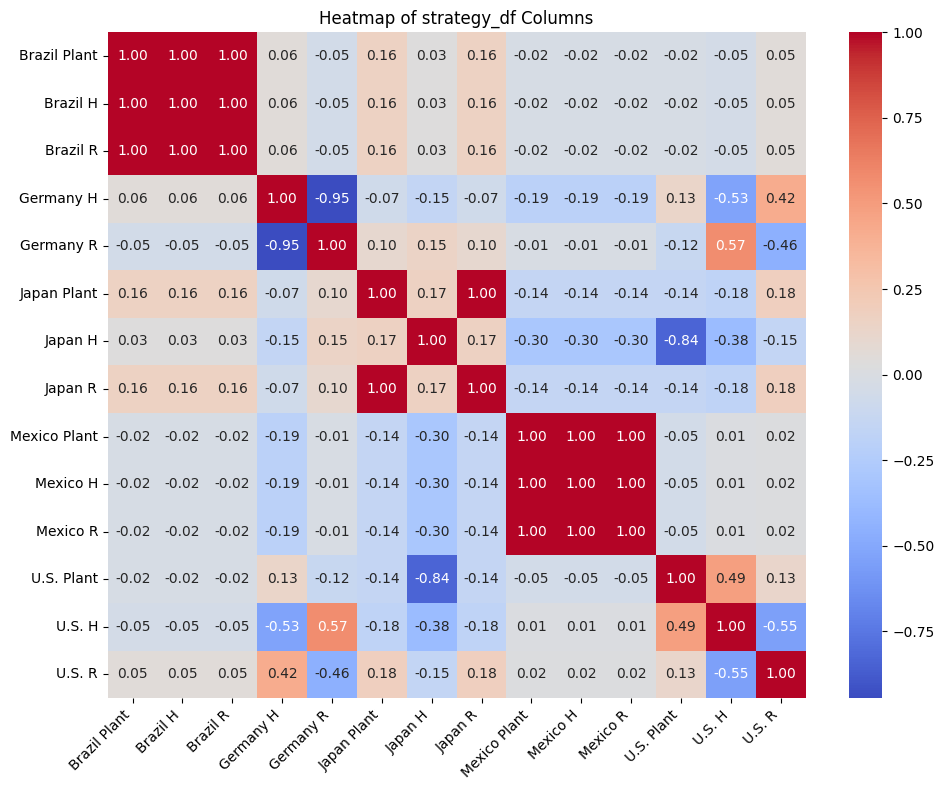

In [ ]:

model = Model("Minimize")


dec_plant = {(i, j): 1 for i in n_ctry for j in n_lines}
dec_h     = {(i, j): 1 for i in n_ctry for j in n_ctry}
dec_r     = {(i, j): 1 for i in n_ctry for j in n_ctry}


dec_plant = {(i, j): model.addVar(vtype=GRB.BINARY, name=f"Dec_plant_{i}_{j}")    for i in n_ctry for j in n_lines}
dec_h     = {(i, j): model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"Dec_h_{i}_{j}") for i in n_ctry for j in n_ctry}
dec_r     = {(i, j): model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"Dec_r_{i}_{j}") for i in n_ctry for j in n_ctry}

excess_cap = calc_excess_cap(dec_plant, dec_h, dec_r)
for i in n_ctry:
    for j in n_lines:
        model.addConstr(excess_cap[i, j] >= 0, name=f"Excess_Cap_Constraints_{i}_{j}")

unnmet_demand = calc_unmet_demand(dec_h, dec_r)
for i in n_ctry:
    for j in range(2):
        model.addConstr(unnmet_demand[i,j] == 0, name=f"Unmet_Demand_Constraints_{i}_{j}")

model.update()
import pandas as pd

strategy_data=[]

for index, row in sample.iterrows():
    model.setObjective(calc_total_cost(dec_plant, dec_h, dec_r, row), GRB.MINIMIZE)
    model.Params.OutputFlag = 0
    model.optimize()
    current_strategy = str([0.0 if x == -0.0 else x for i in n_ctry for j in n_lines for x in [dec_plant[i, j].x]])
    strategy_data.append(current_strategy)
strategy_output = "\n".join(strategy_data)
# Split the 'strategy_output' string into a list of strategy strings
strategy_strings = strategy_output.split("\n")

# Convert each strategy string to a list of numbers
strategy_lists = [eval(strategy) for strategy in strategy_strings]


strategy_df = pd.DataFrame(strategy_lists)
countries = ['Brazil', 'Germany', 'India', 'Japan', 'Mexico', 'U.S.']
labels = ['Plant', 'H', 'R']
column_names = [f'{country} {label}' for country in countries for label in labels]
strategy_df.columns = column_names
# Drop columns related to India from the DataFrame
strategy_df.drop(columns=[col for col in strategy_df if "India" in col], inplace=True)

# Drop columns related to Germany Plant from the DataFrame
strategy_df.drop(columns=[col for col in strategy_df if "Germany Plant" in col], inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming strategy_df is already created and has the correct column names
# Generate a heatmap to visualize the correlation between different columns
plt.figure(figsize=(10, 8))
corr = strategy_df.corr()  # Calculate the correlation matrix
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Heatmap of strategy_df Columns')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


## Question 3

In [ ]:
fixed_values = [[1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0],
        [1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0],
        [1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0]]

for fixed_index, fixed_values in enumerate(fixed_values):
    model = Model("MinimizeCost")
    costs = []
    dec_h     = {(i, j): 1 for i in n_ctry for j in n_ctry}
    dec_r     = {(i, j): 1 for i in n_ctry for j in n_ctry}


    dec_plant = {(i, j): model.addVar(vtype=GRB.BINARY, name=f"Dec_plant_{i}_{j}")    for i in n_ctry for j in n_lines}
    dec_h     = {(i, j): model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"Dec_h_{i}_{j}") for i in n_ctry for j in n_ctry}
    dec_r     = {(i, j): model.addVar(vtype=GRB.CONTINUOUS, lb=0, name=f"Dec_r_{i}_{j}") for i in n_ctry for j in n_ctry}



    # Excess Capacity constraints
    excess_cap = calc_excess_cap(dec_plant, dec_h, dec_r)
    for i in n_ctry:
      for j in n_lines:
        model.addConstr(excess_cap[i, j] >= 0, name=f"Excess_Cap_Constraints_{i}_{j}")

    unnmet_demand = calc_unmet_demand(dec_h, dec_r)
    for i in n_ctry:
      for j in range(2):
        model.addConstr(unnmet_demand[i,j] == 0, name=f"Unmet_Demand_Constraints_{i}_{j}")



    model.update()
    for (i, j), var in dec_plant.items():
        index = list(dec_plant.keys()).index((i, j))  # 获取当前变量的索引
        var.lb = fixed_values[index]
        var.ub = fixed_values[index]


    for index, row in sample.iterrows():
      model.setObjective(calc_total_cost(dec_plant, dec_h, dec_r, row), GRB.MINIMIZE)
      model.Params.OutputFlag = 0
      model.optimize()

      if model.status == GRB.OPTIMAL:
        costs.append(model.ObjVal)



    expected_cost = np.mean(costs)
    cost_std_dev = np.std(costs)

    print(f"The strategy {fixed_index + 1} expected strategy value : {expected_cost}, cost standard deviation : {cost_std_dev}")


The strategy 1 expected strategy value : 1216.7752468737856, cost standard deviation : 48.922414755041224
The strategy 2 expected strategy value : 1221.2737115729456, cost standard deviation : 46.53210562692888
The strategy 3 expected strategy value : 1218.7094729803748, cost standard deviation : 47.6628378100415
